In [1]:
# needed imports
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

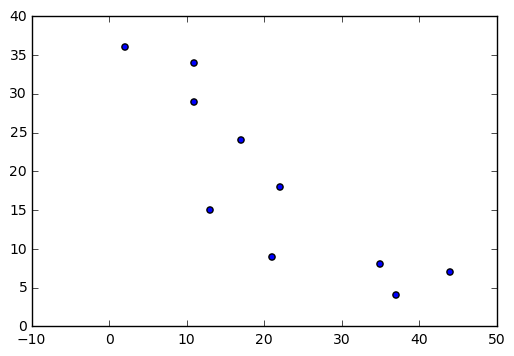

In [2]:
villes = np.array([[2,36],[11,34],[11,29],[17,24],[22,18],[13,15],[21,9],[35,8],[44,7],[37,4]])
plt.scatter(villes[:,0], villes[:,1])
plt.show()

In [3]:
# generate the linkage matrix
Z = linkage(villes, 'complete')

In [4]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(villes))
c

0.67164498340202727

In [5]:
Z

array([[  7.        ,   9.        ,   4.47213595,   2.        ],
       [  1.        ,   2.        ,   5.        ,   2.        ],
       [  3.        ,   4.        ,   7.81024968,   2.        ],
       [  8.        ,  10.        ,   9.05538514,   3.        ],
       [  5.        ,  12.        ,   9.8488578 ,   3.        ],
       [  0.        ,  11.        ,  11.40175425,   3.        ],
       [  6.        ,  14.        ,  15.5241747 ,   4.        ],
       [ 13.        ,  16.        ,  32.01562119,   7.        ],
       [ 15.        ,  17.        ,  51.03920062,  10.        ]])

In [6]:
villes[[7, 9, 8]]

array([[35,  8],
       [37,  4],
       [44,  7]])

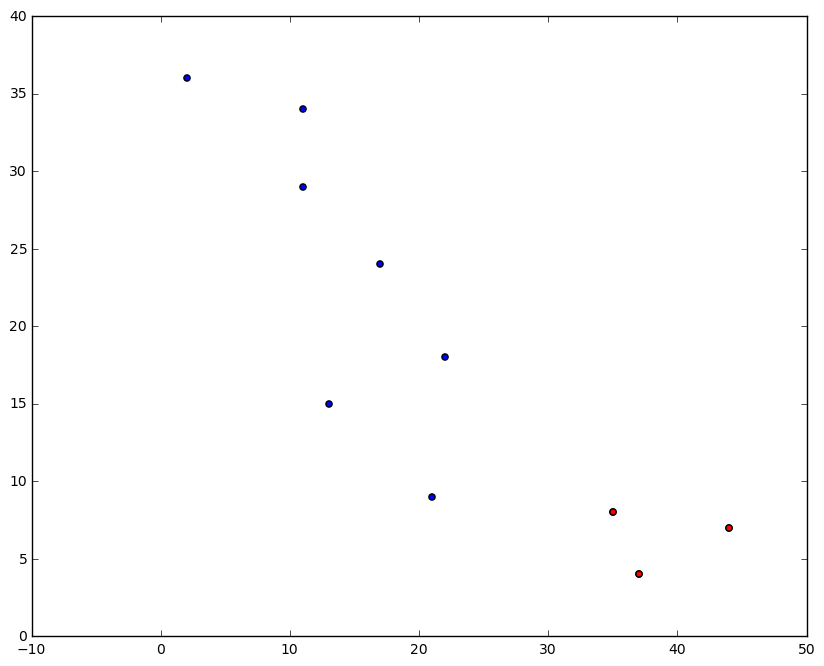

In [7]:
idxs = [7, 9, 8]
plt.figure(figsize=(10, 8))
plt.scatter(villes[:,0], villes[:,1])  # plot all points
plt.scatter(villes[idxs,0], villes[idxs,1], c='r')  # plot interesting points in red again
plt.show()

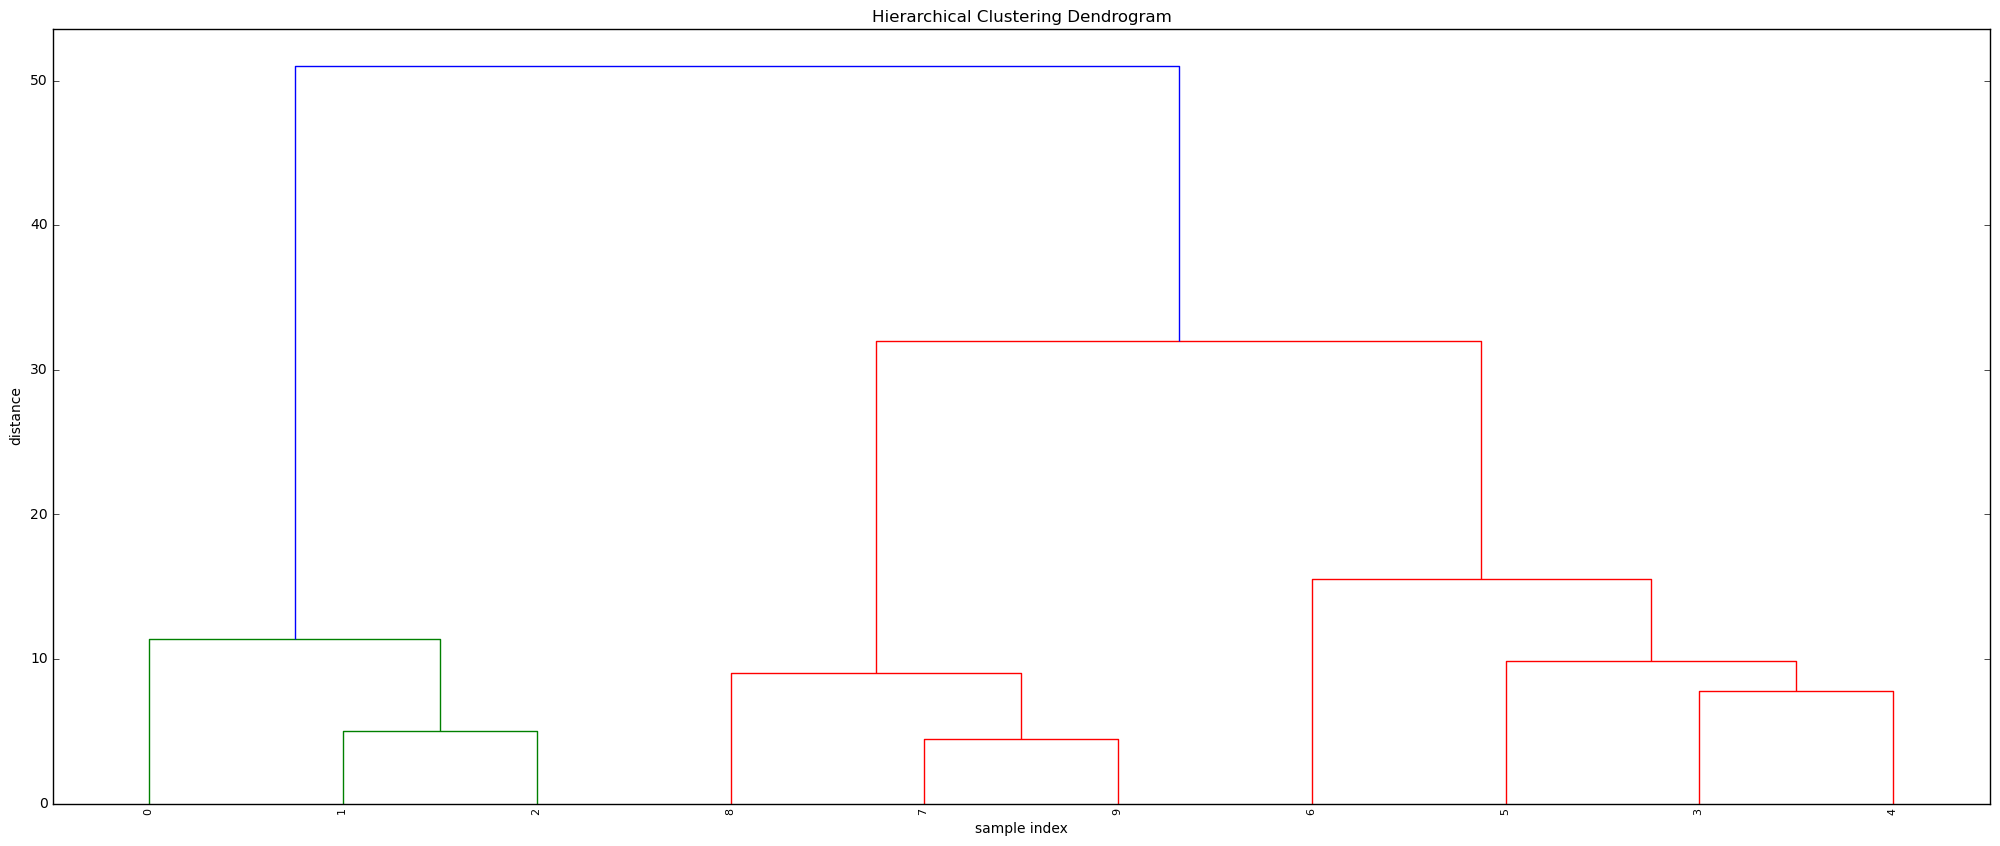

In [8]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

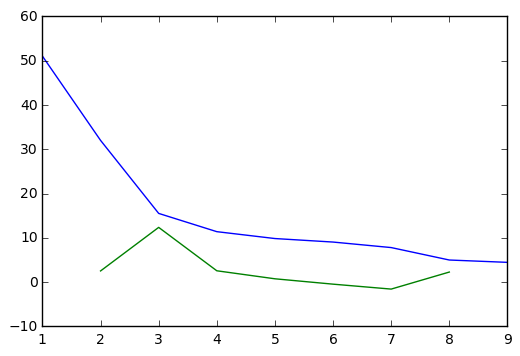

clusters: 3


In [9]:
from scipy.cluster.hierarchy import inconsistent
depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print "clusters:", k

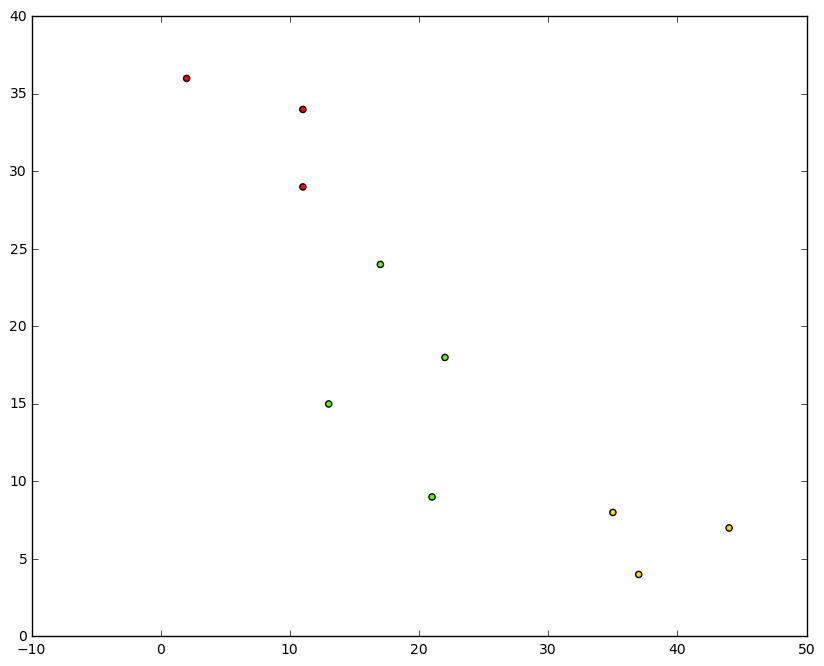

In [10]:
from scipy.cluster.hierarchy import fcluster
k=3
clusters = fcluster(Z, k, criterion='maxclust')
plt.figure(figsize=(10, 8))
plt.scatter(villes[:,0], villes[:,1],c=clusters,cmap='prism')  # plot all points
plt.show()

In [11]:
np.shape(villes)

(10, 2)